# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

# Find Best location for new Liquor Store based on Sales data by location


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Load the data into a DataFrame
iowa=pd.read_csv("../Iowa_Liquor_Sales.csv")
iowa.head(3)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297.0,Templeton Rye w/Flask,6.0,750.0,$18.09,$27.14,6.0,$162.84,4.5,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297.0,Templeton Rye w/Flask,6.0,750.0,$18.09,$27.14,12.0,$325.68,9.0,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249.0,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20.0,150.0,$6.40,$9.60,2.0,$19.20,0.3,0.08


In [5]:
iowa.columns

Index([u'Invoice/Item Number', u'Date', u'Store Number', u'Store Name',
       u'Address', u'City', u'Zip Code', u'Store Location', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Vendor Name', u'Item Number', u'Item Description', u'Pack',
       u'Bottle Volume (ml)', u'State Bottle Cost', u'State Bottle Retail',
       u'Bottles Sold', u'Sale (Dollars)', u'Volume Sold (Liters)',
       u'Volume Sold (Gallons)'],
      dtype='object')

In [6]:
iowa.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number              float64
Item Description          object
Pack                     float64
Bottle Volume (ml)       float64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold             float64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [7]:
#Clean Data
iowa.dropna(inplace=True)
iowa= iowa[iowa['State Bottle Retail'] != 0]
iowa = iowa[iowa['Zip Code'] != "712-2"]

iowa=iowa.replace({'\$':''}, regex=True)
iowa['State Bottle Cost']=iowa['State Bottle Cost'].astype(float)
iowa['State Bottle Retail'] =iowa['State Bottle Retail'].astype(float)
iowa['Bottles Sold']= iowa['Bottles Sold'].astype(float)
iowa['Sale (Dollars)']=iowa['Sale (Dollars)'].astype(float)
iowa['Zip Code']=iowa['Zip Code'].astype(int)
iowa["Date"] = pd.to_datetime(iowa["Date"], format="%m/%d/%Y")

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [8]:
iowa.describe()

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,105904.000000,105904.000000,105904.000000,1.059040e+05,105904.000000,105904.000000,105904.000000,105904.000000,105904.000000,105904.000000,105904.000000,105904.000000,105904.000000,105904.000000
mean,3491.469614,51276.393885,57.078732,1.044542e+06,256.216734,45603.627899,12.167284,931.907709,9.432315,14.178832,9.695536,125.300972,8.928608,2.358853
std,867.764234,989.541061,27.245738,5.066498e+04,143.079156,49484.060376,7.399580,477.219532,6.737802,10.106178,22.237822,387.674648,26.239569,6.931748
min,2106.000000,50002.000000,1.000000,1.011100e+06,10.000000,173.000000,1.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.030000
25%,2602.000000,50316.000000,31.000000,1.012210e+06,115.000000,27102.000000,6.000000,750.000000,5.480000,8.240000,3.000000,30.380000,1.750000,0.460000
50%,3651.000000,51103.000000,61.000000,1.032080e+06,260.000000,38177.000000,12.000000,750.000000,7.870000,11.820000,6.000000,69.060000,5.250000,1.390000
75%,4193.000000,52310.000000,77.000000,1.062310e+06,380.000000,62097.000000,12.000000,1000.000000,11.500000,17.310000,12.000000,134.160000,10.500000,2.770000
max,9018.000000,56201.000000,99.000000,1.701100e+06,978.000000,994200.000000,336.000000,6000.000000,563.400000,845.100000,2328.000000,41042.640000,2328.000000,614.990000


In [14]:
#Revenue by Liquor
iowa.groupby(["Category Name"])['Sale (Dollars)'].sum().sort_values(ascending=False).head(5)

Category Name
CANADIAN WHISKIES    1539828.48
VODKA 80 PROOF       1500698.65
SPICED RUM           1097772.81
IMPORTED VODKA        756663.06
TEQUILA               750949.29
Name: Sale (Dollars), dtype: float64

In [38]:
#favoriate drinks Of Iowa
iowa.groupby(["Category Name"])['Bottles Sold'].sum().sort_values(ascending=False).head(5)

Category Name
VODKA 80 PROOF       191739.0
CANADIAN WHISKIES    114131.0
SPICED RUM            72020.0
TEQUILA               44826.0
BLENDED WHISKIES      43572.0
Name: Bottles Sold, dtype: float64

In [ ]:
#print iowa.groupby(['Item Description','Item Number','City','County','Bottle Volume (ml)'])['State Bottle Retail'].mean()

In [ ]:
#print iowa.groupby(['Item Description','Item Number','Bottle Volume (ml)'])['State Bottle Cost'].std().sort_values(ascending=False)

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

In [16]:
#print iowa.groupby(['Bottle Volume (ml)'])['State Bottle Cost'].mean().sort_values(ascending=False)

In [44]:
#Very Expensive Drinks
iowa.groupby(['Item Description'])['State Bottle Retail'].mean().sort_values(ascending=False).head(10)

Item Description
Macallan Sherry Cask 25 Year Old Scotch - HA    845.100000
Cragganmore Distillers Edition 25YR HA          420.000000
Absolut w/4-50mls                               206.257500
Johnnie Walker Blue w/2 Glasses                 195.000000
Johnnie Walker Blue                             193.148182
Redbreast 21yr HA                               187.490000
Hennessy XO                                     157.490000
Dt Lonach Glendarroch 1966 42yr                 153.000000
Macallan 18yr Single Malt Scotch                152.653333
Hennessy XO Cognac                              149.990000
Name: State Bottle Retail, dtype: float64

In [45]:
print "Price per Bottle"
print "Min  " , iowa['State Bottle Retail'].min()
print "Max  " , iowa['State Bottle Retail'].max()
print "Mean " , iowa['State Bottle Retail'].mean()
print "Std  " , iowa['State Bottle Retail'].std()
print "Median" , np.median(iowa['State Bottle Retail'])


Price per Bottle
Min   0.0
Max   845.1
Mean  14.1788320554
Std   10.1061777656
Median 11.82


In [46]:
iowa[iowa['State Bottle Retail'] > 400]

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
42336,S28118600002,2015-09-28,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7.0,Black Hawk,...,903542.0,Cragganmore Distillers Edition 25YR HA,6.0,750.0,280.0,420.0,1.0,420.0,0.75,0.2
98070,S21890700007,2014-10-20,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,905502.0,Macallan Sherry Cask 25 Year Old Scotch - HA,1.0,750.0,563.4,845.1,1.0,845.1,0.75,0.2


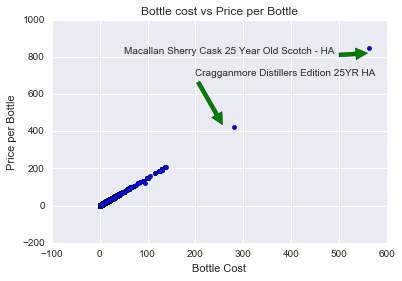

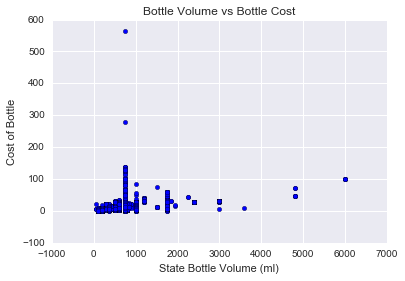

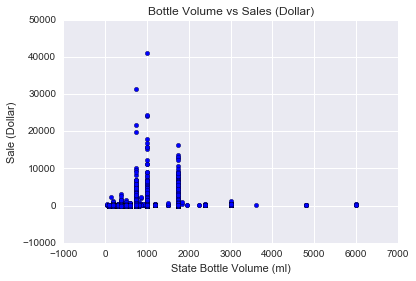

In [47]:

plt.scatter(iowa['State Bottle Cost'], iowa['State Bottle Retail'])
plt.xlabel('Bottle Cost')
plt.ylabel('Price per Bottle')
plt.title('Bottle cost vs Price per Bottle')
plt.annotate('Cragganmore Distillers Edition 25YR HA', xy=(260, 420), xytext=(200, 700),
            arrowprops=dict(facecolor='green', shrink=0.05),
            )
plt.annotate("Macallan Sherry Cask 25 Year Old Scotch - HA ", xy=(560, 820), xytext=(50, 820),
            arrowprops=dict(facecolor='green'),
            )
plt.show()

plt.scatter(iowa['Bottle Volume (ml)'],iowa['State Bottle Cost'])
plt.xlabel('State Bottle Volume (ml)')
plt.ylabel('Cost of Bottle')
plt.title('Bottle Volume vs Bottle Cost')

plt.show()

plt.scatter(iowa['Bottle Volume (ml)'],iowa['Sale (Dollars)'])
plt.xlabel('State Bottle Volume (ml)')
plt.ylabel('Sale (Dollar)')
plt.title('Bottle Volume vs Sales (Dollar)')

plt.show()


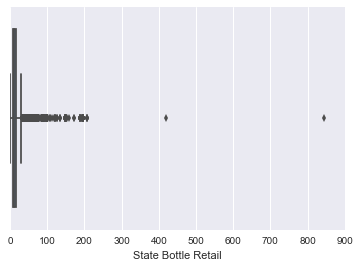

In [48]:
sns.boxplot(iowa['State Bottle Retail'], data=iowa);



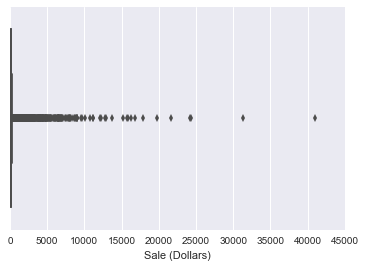

In [49]:

sns.boxplot(iowa['Sale (Dollars)'], data=iowa);


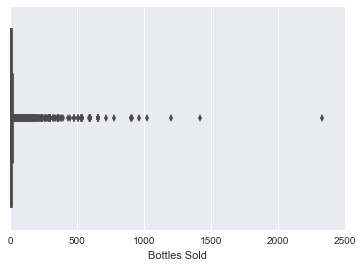

In [50]:
sns.boxplot(iowa['Bottles Sold'], data=iowa);

In [ ]:
sns.swarmplot(iowa['Zip Code'],iowa['Sale (Dollars)'])

In [ ]:
sns.swarmplot(iowa['Zip Code'],iowa['Bottles Sold'], data=iowa);

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [ ]:
#

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [17]:

reg_iowa=pd.DataFrame(iowa[['City','County','Zip Code','Store Number','Sale (Dollars)','State Bottle Retail', 'State Bottle Cost','Bottles Sold']])



In [18]:
reg_iowa.corr()

,Zip Code,Store Number,Sale (Dollars),State Bottle Retail,State Bottle Cost,Bottles Sold
Zip Code,1.000000,-0.012580,-0.000986,-0.022147,-0.022095,0.001629
Store Number,-0.012580,1.000000,-0.023686,-0.065318,-0.064916,0.000046
Sale (Dollars),-0.000986,-0.023686,1.000000,0.142830,0.142702,0.859060
State Bottle Retail,-0.022147,-0.065318,0.142830,1.000000,0.999868,-0.054154
State Bottle Cost,-0.022095,-0.064916,0.142702,0.999868,1.000000,-0.054103
Bottles Sold,0.001629,0.000046,0.859060,-0.054154,-0.054103,1.000000


In [19]:
reg_iowa=reg_iowa.groupby(['City','County','Zip Code','Store Number'],as_index=False)

In [20]:
#reg_iowa.aggregate(np.sum)
reg_iowa=pd.DataFrame(reg_iowa.agg({'Sale (Dollars)' : np.sum, 'State Bottle Retail' :np.mean, 'State Bottle Cost':np.mean,'Bottles Sold':np.sum}))

In [21]:
print "Total Sale           ", reg_iowa['Sale (Dollars)'].sum()
mean= reg_iowa.groupby(['City','County','Zip Code','Store Number'])['Sale (Dollars)'].mean().mean()
print "Mean Sale Per Store  " , mean
stdmean= reg_iowa.groupby(['City','County','Zip Code','Store Number'])['Sale (Dollars)'].mean().std()
print "Std Sale Per Store   ", stdmean
medianmean= reg_iowa.groupby(['City','County','Zip Code','Store Number'])['Sale (Dollars)'].mean().median()
print "Median Sale Per Store", medianmean

Total Sale            13269874.17
Mean Sale Per Store   8583.35974774
Std Sale Per Store    20962.8613621
Median Sale Per Store 2650.34


In [22]:
reg_iowa['Sale (Dollars)']=[0 if x <= 5500 else 1 for x in reg_iowa['Sale (Dollars)']]


In [23]:
reg_iowa['Sale (Dollars)'].isnull().sum()

0

In [24]:
reg_iowa.groupby(['Sale (Dollars)']).count()

,City,County,Zip Code,Store Number,State Bottle Retail,Bottles Sold,State Bottle Cost
Sale (Dollars),,,,,,,
0,1067,1067,1067,1067,1067,1067,1067
1,479,479,479,479,479,479,479


In [25]:
reg_iowa.dtypes

City                    object
County                  object
Zip Code                 int64
Store Number             int64
State Bottle Retail    float64
Bottles Sold           float64
Sale (Dollars)           int64
State Bottle Cost      float64
dtype: object

In [114]:
reg_iowa['Sale (Dollars)']=reg_iowa['Sale (Dollars)'].astype(int)
#reg_df['Zip Code']=reg_df['Zip Code'].astype(int)

In [26]:
#reg_ed=reg_df[reg_df['Zip Code']=="712-2"]
reg_iowa['Sale (Dollars)'].unique()


array([0, 1])

In [27]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
X=reg_iowa[['Zip Code','State Bottle Retail', 'State Bottle Cost','Bottles Sold']]
y=reg_iowa['Sale (Dollars)']


In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=77)

In [31]:
# import KNN from SKLearn, instatiate a model with one neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
model=knn.fit(X, y)
score = knn.score(X_test, y_test)
y_pred=knn.predict(X_test)
    
print score

0.949547218629


In [32]:
from sklearn.grid_search import GridSearchCV
parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]
knnGS = GridSearchCV(KNeighborsClassifier(), parameters)
knnGS.fit(X_test, y_test)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [33]:
knnGS.best_params_

{'n_neighbors': 20, 'weights': 'distance'}

In [ ]:
#Implement  best parameters k=20  and weights =distance

In [55]:
knn20 = KNeighborsClassifier(n_neighbors = 20,weights='distance')
model=knn20.fit(X_train, y_train)
score = knn20.score(X_test, y_test)
y_pred20=knn20.predict(X_test)
    
print score

0.930142302717


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

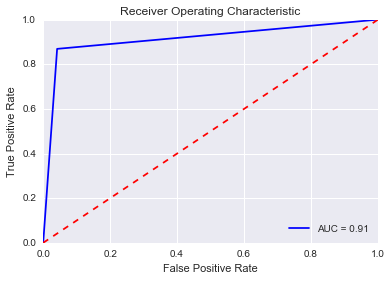

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred20)
roc_auc = auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [ ]:
# the best result  is the maximum area under the curve of 0.91 at treshold ~(0.6,0.9), suggests we can predict the best prices of liquor with 91%accuracy


In [61]:
print "False Posistive Rate:", fpr[1]
print "true Posistive Rate:", tpr[1]

False Posistive Rate: 0.0415879017013
true Posistive Rate: 0.868852459016


In [ ]:
However, there are some areas that are predited to have a flase higher price (fpr). Depending on the need to predict
precisely we will choose the level of the treshhold and adjust the model.
